# Summary

In [12]:
import pandas as pd

# Load the flattened dataset
df = pd.read_csv('../2_Generation/data/parsed_fulltext_cases.csv')

# Total number of citations
total_records = len(df)
print(f"Total Records: {total_records}")

Total Records: 3890


In [13]:
# Flatten all catchphrases and count total
total_catchphrases = sum(df['catchphrases'].apply(len))
print(f"Total Number of Catchphrases: {total_catchphrases}")


Total Number of Catchphrases: 1804403


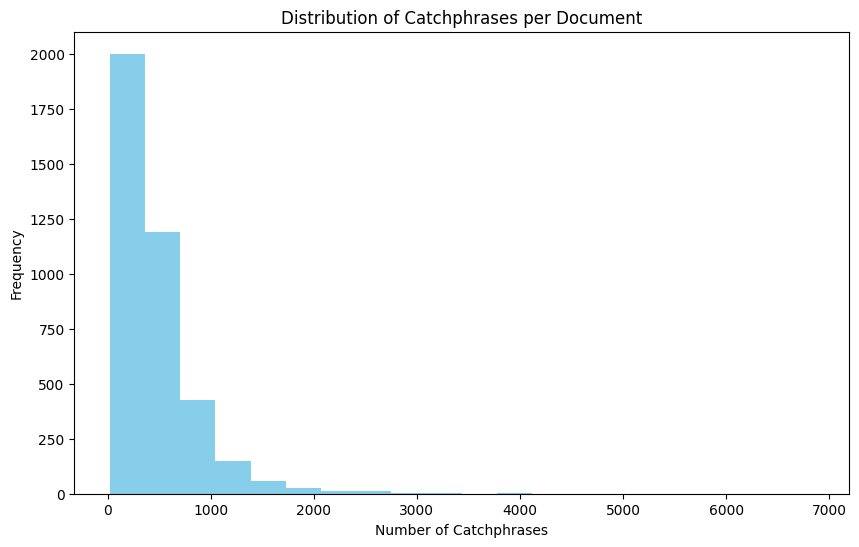

In [14]:
import matplotlib.pyplot as plt

# Bar plot for number of catchphrases per document
df['num_catchphrases'] = df['catchphrases'].apply(len)

plt.figure(figsize=(10, 6))
df['num_catchphrases'].plot(kind='hist', bins=20, color='skyblue')
plt.title('Distribution of Catchphrases per Document')
plt.xlabel('Number of Catchphrases')
plt.ylabel('Frequency')
plt.show()


In [15]:
# Calculate word count for each document (sentences)
df['word_count'] = df['sentences'].apply(lambda x: len(x.split()))

# Display statistics for word counts
print(df['word_count'].describe())


count      3890.000000
mean       6388.312596
std       11473.127117
min         120.000000
25%        2006.000000
50%        3872.000000
75%        7251.250000
max      427796.000000
Name: word_count, dtype: float64


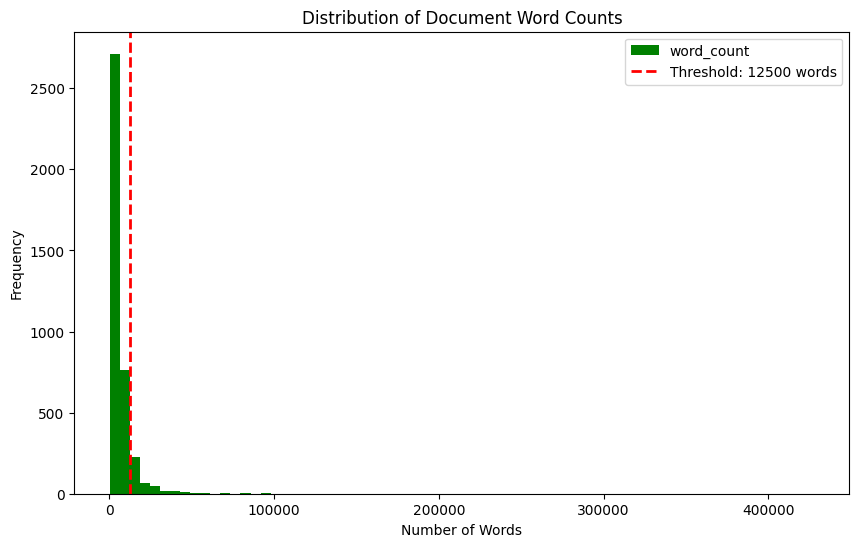

Number of documents with more than 12500 words: 405


In [16]:
import matplotlib.pyplot as plt

# Set the word count threshold
word_count_threshold = 12500  # Example threshold

# Histogram for word count distribution
plt.figure(figsize=(10, 6))
df['word_count'].plot(kind='hist', bins=70, color='green')

# Add a vertical red line at the threshold
plt.axvline(word_count_threshold, color='red', linestyle='dashed', linewidth=2, label=f'Threshold: {word_count_threshold} words')

# Add labels and title
plt.title('Distribution of Document Word Counts')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.show()

# Calculate how many documents have word counts greater than the threshold
docs_above_threshold = df[df['word_count'] > word_count_threshold].shape[0]
print(f"Number of documents with more than {word_count_threshold} words: {docs_above_threshold}")


Large documents will be trimed

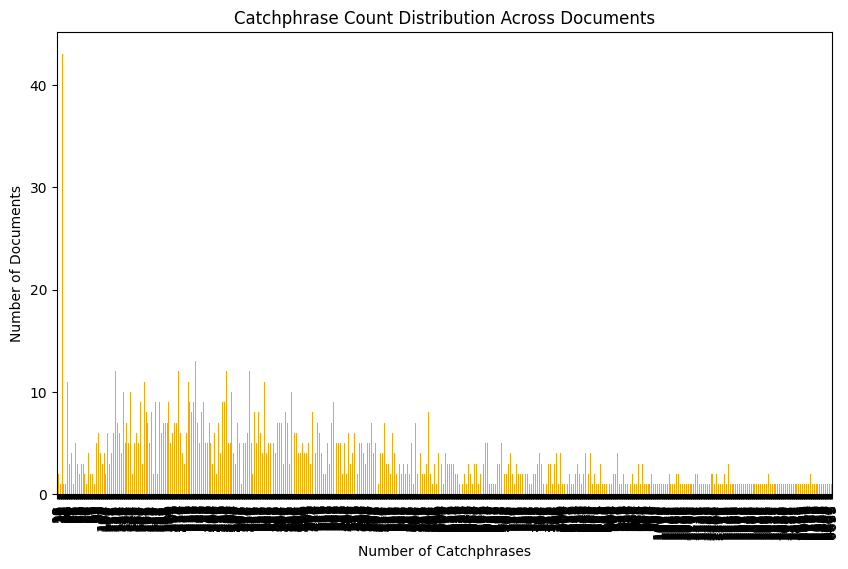

In [17]:
# Bar plot for catchphrase distribution
plt.figure(figsize=(10, 6))
df['num_catchphrases'].value_counts().sort_index().plot(kind='bar', color='orange')
plt.title('Catchphrase Count Distribution Across Documents')
plt.xlabel('Number of Catchphrases')
plt.ylabel('Number of Documents')
plt.show()


In [18]:
df

,filename,name,AustLII,catchphrases,sentences,num_catchphrases,word_count
0,08_1056.xml,University of Western Australia v Gray (No 21)...,http://www.austlii.edu.au/au/cases/cth/FCA/200...,"['indemnity costs', 'calderbank letter', 'refu...",1 On 17 April 2008 the application brought by ...,193,5488
1,09_930.xml,Parker v Parker [2009] FCA 930 (25 August 2009),http://www.austlii.edu.au/au/cases/cth/FCA/200...,"['judicial review', 'application brought pursu...",INTRODUCTION \n The applicant seeks review of ...,381,5046
2,06_1301.xml,CSL Limited v GlaxoSmithKline Australia Pty Lt...,http://www.austlii.edu.au/au/cases/cth/FCA/200...,"['interlocutory injunction', 'quia timet injun...","1 The applicant, CSL Limited (""CSL""), seeks an...",349,9115
3,09_1042.xml,Field v St George Bank Limited [2009] FCA 1042...,http://www.austlii.edu.au/au/cases/cth/FCA/200...,"[""creditor's petition"", 'sequestration order',...",BACKGROUND TO THE APPEAL \n This is an appeal ...,289,10660
4,08_1730.xml,Deputy Commissioner of Taxation v BK Ganter Ho...,http://www.austlii.edu.au/au/cases/cth/FCA/200...,"['winding up', 'neglect to pay debt after stat...",1 This matter came on for hearing before me ye...,522,3993
...,...,...,...,...,...,...,...
3885,07_1318.xml,Minister for Immigration and Citizenship v Le ...,http://www.austlii.edu.au/au/cases/cth/FCA/200...,"['appeal from decision of federal magistrate',...",1 Ms Le and Mr Nguyen are married to one anoth...,840,15531
3886,06_416.xml,Spalla v St George Wholesale Finance Pty Ltd [...,http://www.austlii.edu.au/au/cases/cth/FCA/200...,"['disqualification for apprehended bias', 'all...","1 In this proceeding, the applicant, Anthony S...",256,1998
3887,09_929.xml,Parker v Antoine [2009] FCA 929 (25 August 2009),http://www.austlii.edu.au/au/cases/cth/FCA/200...,"['judicial review', 'application brought pursu...",INTRODUCTION \n The applicant seeks review of ...,431,4166
3888,06_1318.xml,Swanline Pty Ltd v Ace Global Lloyds Syndicate...,http://www.austlii.edu.au/au/cases/cth/FCA/200...,['application for separate hearing to determin...,"1 The applicant, Swanline Pty Ltd, applies, pu...",154,1167


In [23]:
print(df['sentences'][0])

1 On 17 April 2008 the application brought by the University of Western Australia (UWA) against Dr Bruce Gray and Sirtex Medical Ltd (Sirtex) was dismissed. UWA was ordered to pay the costs of Dr Gray and Sirtex. A cross-claim brought by Sirtex against UWA was dismissed and Sirtex ordered to pay UWA's costs of that cross-claim. Sirtex succeeded in its cross-claim against Dr Gray. 2 Paragraphs 14 and 15 of the Orders made on 17 April 2008 provided: 
 
 
 14. Any party in respect of whom an order for costs has been made in the preceding orders is at liberty to file and serve written submissions on or before 8 May 2008 seeking a variation of the costs order. 15. Any party who wishes to respond to a written submission filed pursuant to the preceding order is to do so by filing and serving a written submission by 29 May 2008. 3 On 12 May 2008 Sirtex filed a motion seeking the following orders: 
 
 
 1.1 that Order 2 of his Honour Justice French, made on 17 April 2008, be amended to read as 

In [24]:
print(df['catchphrases'][0])

['indemnity costs', 'calderbank letter', 'refusal of offer', 'whether refusal unreasonable', 'variety of factors relevant to assessment of unreasonableness', 'indemnity costs refused', 'costs']
